# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 626


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leningradskiy
Processing Record 2 of Set 1 | brownsville
Processing Record 3 of Set 1 | geraldton
Processing Record 4 of Set 1 | luderitz
Processing Record 5 of Set 1 | ust-tsilma
Processing Record 6 of Set 1 | peniche
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | porto novo
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | mogadishu
Processing Record 16 of Set 1 | mount gambier
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | srednekolymsk
Processing Record 21 of Set 1 | airai
Processing Record 22 of Set 1 | berlevag
Processing Record 23 of Se

Processing Record 40 of Set 4 | hobyo
Processing Record 41 of Set 4 | castro
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | saint-leu
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | keflavik
Processing Record 47 of Set 4 | japura
Processing Record 48 of Set 4 | thompson
Processing Record 49 of Set 4 | boguchany
Processing Record 0 of Set 5 | dharchula
Processing Record 1 of Set 5 | seoul
Processing Record 2 of Set 5 | doka
Processing Record 3 of Set 5 | terrace bay
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | durazno
Processing Record 7 of Set 5 | albanel
Processing Record 8 of Set 5 | upernavik
Processing Record 9 of Set 5 | gohana
Processing Record 10 of Set 5 | mubende
Processing Record 11 of Set 5 | mindelo
Processing Record 12 of Set 5 | rocha
Processing Record 13 of Set 5 | attawapiskat
City not found. Skipping...
P

Processing Record 30 of Set 8 | esperance
Processing Record 31 of Set 8 | meyungs
City not found. Skipping...
Processing Record 32 of Set 8 | yagodnoye
Processing Record 33 of Set 8 | kloulklubed
Processing Record 34 of Set 8 | belyy yar
Processing Record 35 of Set 8 | touros
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | dunedin
Processing Record 38 of Set 8 | gorin
Processing Record 39 of Set 8 | nezhinka
Processing Record 40 of Set 8 | ndiekro
City not found. Skipping...
Processing Record 41 of Set 8 | ketchikan
Processing Record 42 of Set 8 | sitka
Processing Record 43 of Set 8 | borogontsy
Processing Record 44 of Set 8 | bauchi
Processing Record 45 of Set 8 | bezhetsk
Processing Record 46 of Set 8 | sirfa
City not found. Skipping...
Processing Record 47 of Set 8 | ozinki
Processing Record 48 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 8 | vostok
Processing Record 0 of Set 9 | condoto
Processing Record 1 of Set 9 | najran
P

Processing Record 18 of Set 12 | vazante
Processing Record 19 of Set 12 | kosa
Processing Record 20 of Set 12 | chum phae
Processing Record 21 of Set 12 | kaspiysk
Processing Record 22 of Set 12 | bontang
Processing Record 23 of Set 12 | alofi
Processing Record 24 of Set 12 | nsoko
Processing Record 25 of Set 12 | malpe
Processing Record 26 of Set 12 | sur
Processing Record 27 of Set 12 | maniitsoq
Processing Record 28 of Set 12 | conde
Processing Record 29 of Set 12 | homer
Processing Record 30 of Set 12 | olinda
Processing Record 31 of Set 12 | le port
Processing Record 32 of Set 12 | hamilton
Processing Record 33 of Set 12 | havelock
Processing Record 34 of Set 12 | udachnyy
Processing Record 35 of Set 12 | valdemarpils
Processing Record 36 of Set 12 | byumba
Processing Record 37 of Set 12 | oxapampa
Processing Record 38 of Set 12 | eyl
Processing Record 39 of Set 12 | ardmore
Processing Record 40 of Set 12 | aguimes
Processing Record 41 of Set 12 | mayumba
Processing Record 42 of S

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,leningradskiy,69.3833,178.4167,-30.45,100,100,1.37,RU,1675430378
1,brownsville,25.9018,-97.4975,6.97,89,100,4.63,US,1675430378
2,geraldton,-28.7667,114.6000,27.23,65,100,3.60,AU,1675430379
3,luderitz,-26.6481,15.1594,23.50,58,85,10.42,NA,1675430379
4,ust-tsilma,65.4410,52.1498,-12.72,100,94,0.80,RU,1675430379


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leningradskiy,69.3833,178.4167,-30.45,100,100,1.37,RU,1675430378
1,brownsville,25.9018,-97.4975,6.97,89,100,4.63,US,1675430378
2,geraldton,-28.7667,114.6000,27.23,65,100,3.60,AU,1675430379
3,luderitz,-26.6481,15.1594,23.50,58,85,10.42,NaN,1675430379
4,ust-tsilma,65.4410,52.1498,-12.72,100,94,0.80,RU,1675430379


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

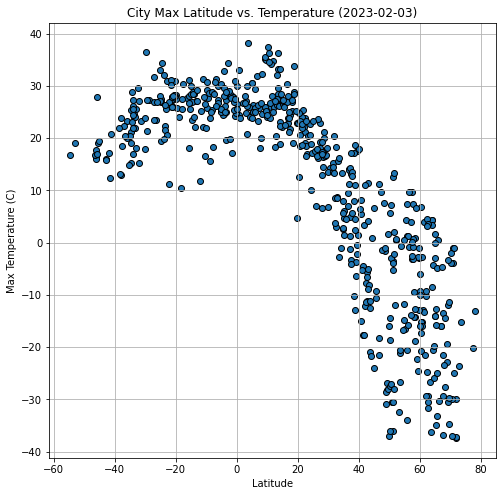

In [38]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize = (8,8))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

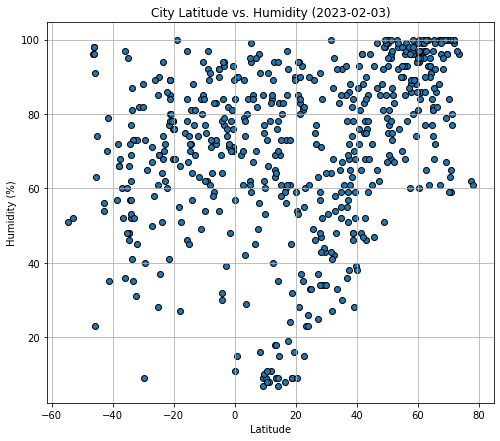

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (8,7))
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

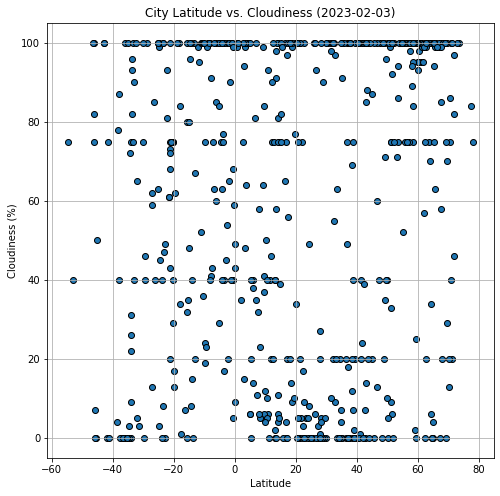

In [40]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (8,8))
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor = 'black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

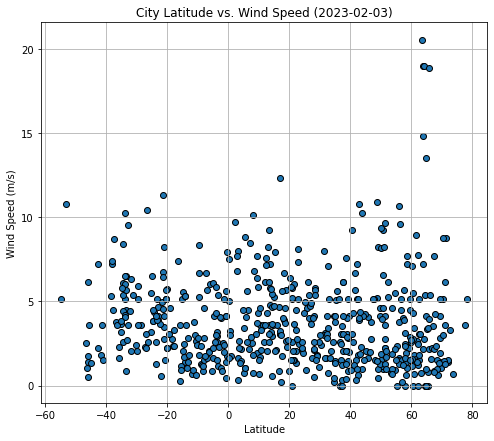

In [41]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (8,7))
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor = 'black')

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed (2023-02-03)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def linear_regression(dataframe,column_1,column_2):
    
    # Assigning the values in both columns to its variable.
    x_value = dataframe[column_1]
    y_value = dataframe[column_2]
    
    # Use linregress to calculate slope, intercept, rvalue, pvalue, and stderr.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    
    # Linear Regression Eq.
    regress_values = x_value * slope + intercept
    m = round(slope,2)
    b = round(intercept,2)
    line_eq = f"y = {m}x + {b}"
    
    # Plotting
    plt.figure(figsize = (9,7))
    plt.scatter(x_value, y_value,linewidth = 3)
    
    # Adding the linear regression line
    plt.plot(x_value, regress_values,"r-")
    
    # Adding the linear equation formula
    plt.annotate(line_eq,(min(x_value),min(y_value) + 6),fontsize = 15, color = "red")
    
    # Labels
    plt.xlabel("Latitude", fontsize = 14)
    plt.ylabel(column_2, fontsize = 14)
    
    # Print the r-vlaue
    print(f"The r-value \033[1mis\033[0m: {rvalue}")
    
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leningradskiy,69.3833,178.4167,-30.45,100,100,1.37,RU,1675430378
1,brownsville,25.9018,-97.4975,6.97,89,100,4.63,US,1675430378
4,ust-tsilma,65.4410,52.1498,-12.72,100,94,0.80,RU,1675430379
5,peniche,39.3558,-9.3811,17.47,52,0,1.44,PT,1675430120
6,albany,42.6001,-73.9662,-11.08,52,7,1.79,US,1675430238


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,geraldton,-28.7667,114.6000,27.23,65,100,3.60,AU,1675430379
3,luderitz,-26.6481,15.1594,23.50,58,85,10.42,NaN,1675430379
7,punta arenas,-53.1500,-70.9167,19.06,52,40,10.80,CL,1675430380
9,atuona,-9.8000,-139.0333,25.74,77,24,8.34,PF,1675430381
11,mataura,-46.1927,168.8643,16.37,98,100,1.38,NZ,1675430382


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8499974383089142


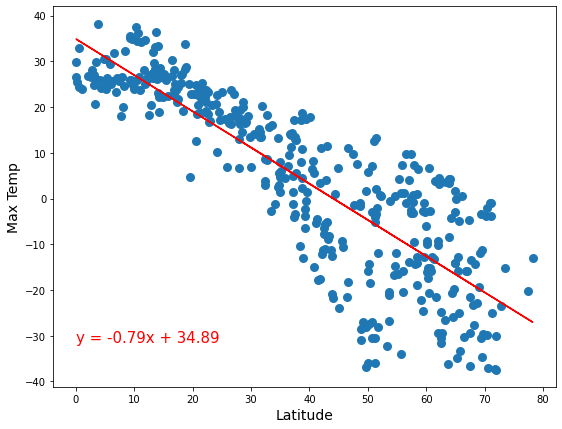

In [29]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Max Temp")

The r-value is: 0.461137468037798


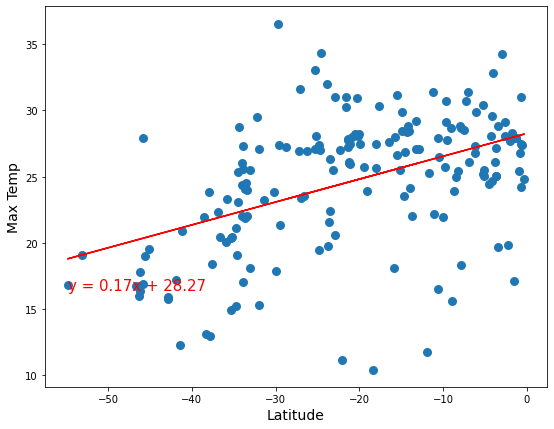

In [31]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Max Temp")

**Discussion about the linear relationship:** Taking acount of the r-values and the slope of the linear regression, this data set indicates that in the Northern hemisphere there is a strong correlation between Latitude and the Max Temperature. As Latitude increases, moving from the Equator to the North Pole, the Max Temperature decreases. On the Southern hemisphere, the correlation is Weak, with the r-value of 0.46. But it shows that, as Latitude decreases, moving from the Equator to the South Pole, the Max Temperature also decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4918484865566752


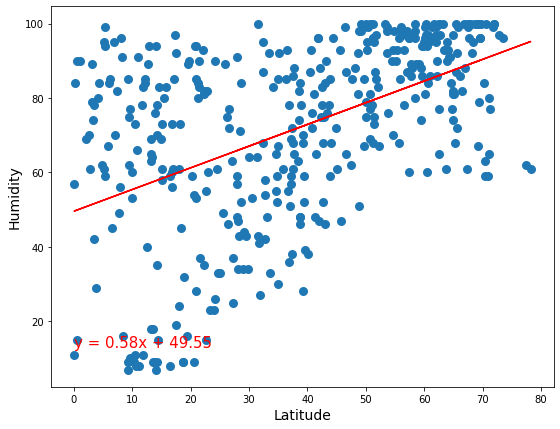

In [32]:
# Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Humidity")

The r-value is: 0.21456591612789283


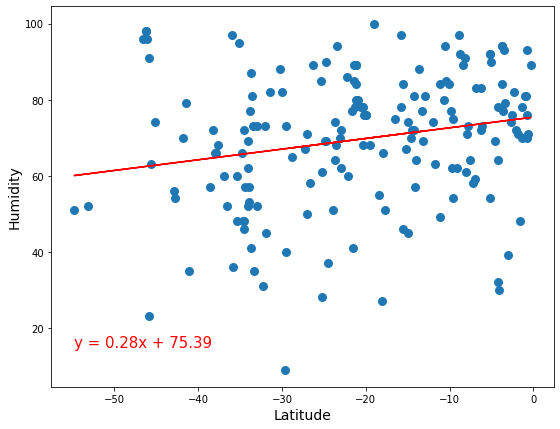

In [33]:
# Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Humidity")

**Discussion about the linear relationship:** Taking acount of the r-values and the slope of the linear regression, this data set indicates that Latitude is not a good indicator for Humidity, having a correlation strength weak, in the Northern hemispher, and very weak or none existent, in the Southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.30267216896464966


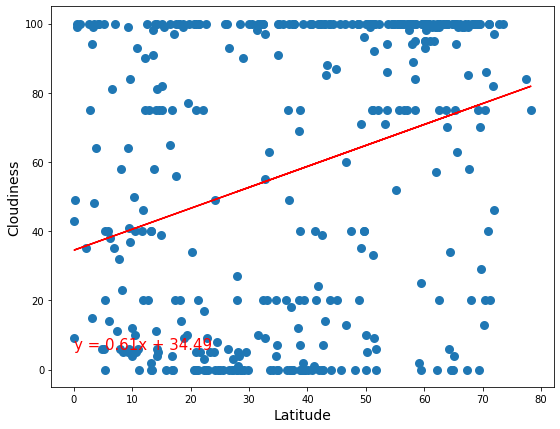

In [34]:
# Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Cloudiness")

The r-value is: 0.25157051492109217


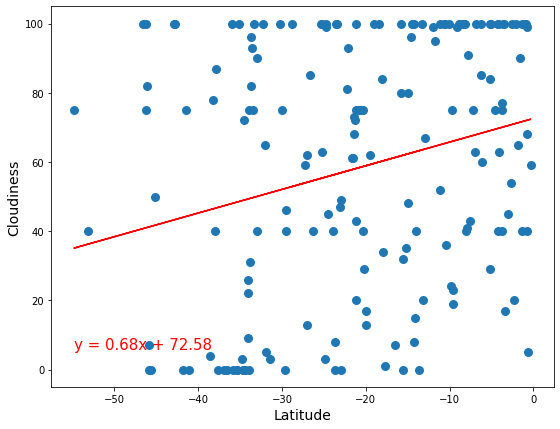

In [35]:
# Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Cloudiness")

**Discussion about the linear relationship:** Taking acount of the r-values and the slope of the linear regression, this data set indicates that Latitude is not a good indicator for Cloudiness, having a correlation strength weak or none existent in both Northern and Southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.03037025733475456


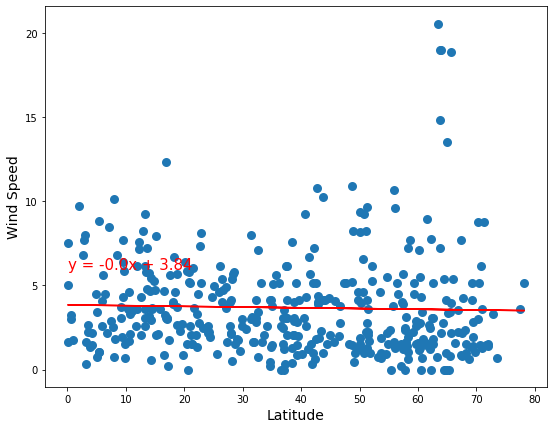

In [36]:
# Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Wind Speed")

The r-value is: -0.23893661869650193


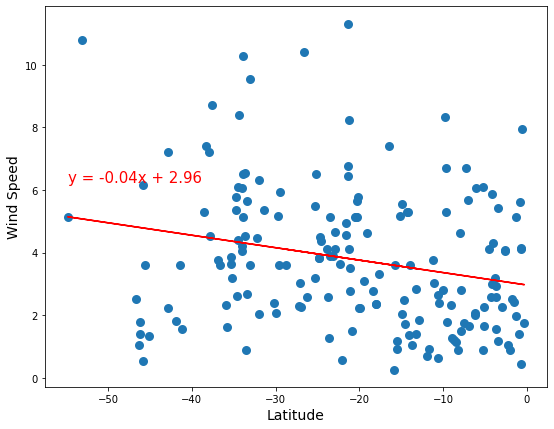

In [37]:
# Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Wind Speed")

**Discussion about the linear relationship:** Similar to Humidity, this data set indicates that Latitude is not a good indicator for Wind speed, having a correlation strength weak or none existent in both Northern and Southern hemispheres.